In [7]:
import os, maboss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [8]:
def plot(series, colors = ['black', 'blue', 'red']):
    plt.figure(figsize=(20,20))
    for i, serie in enumerate(series):
        
        for subserie in serie:
            x = subserie.index.values/24
            y = subserie.values
            plt.semilogy(x, y, color=colors[i])
        
    plt.legend([subserie.name for serie in series for subserie in serie ])
    plt.xlabel = "days"
    plt.ylabel = "population ratio"

## Simulation of TCR2 activation + TGFB

In [9]:
t0 = time.time()
upp_actr2_tgfb = maboss.UpdatePopulation(
    maboss.load(
        "TregModel_InitPop.bnd",
        "TregModel_InitPop_ActTCR2_TGFB.cfg",
    ),
    "TregModel_InitPop.upp"
)

upp_actr2_tgfb_result = upp_actr2_tgfb.run(workdir="TregModel_InitPop_TGFB")

serie_actr2_tgfb = upp_actr2_tgfb_result.get_population_ratios()
serie_actr2_tgfb.name = "TCR2 activation + TGFB"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 1.16s


In [10]:
t0 = time.time()
spd_actr2_tgfb = upp_actr2_tgfb_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 650.97s


# Counting cell types

Here we need to have the nodes required as active, and the nodes required as inactive

In [11]:
cell_types = [
     (["CD25", "Proliferation"], ["FOXP3"]),
     (["FOXP3", "CD25", "Proliferation"], []),
     (["FOXP3", "Proliferation"], ["CD25"]),
     (["CD25"], ["FOXP3", "Proliferation"]),
     (["FOXP3", "CD25"], ["Proliferation"]),
     (["FOXP3"], ["CD25", "Proliferation"]),
]

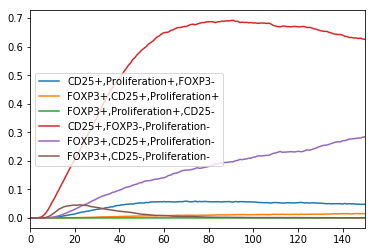

In [12]:
for (include_node, exclude_node) in cell_types:
    (upp_actr2_tgfb_result
        .get_stepwise_probability_distribution(include=include_node, exclude=exclude_node)
        .sum(axis=1)
        .plot(label=(
            ",".join(["%s+" % node for node in include_node]) 
            + ("," if len(exclude_node) > 0 else "" ) 
            + ",".join(["%s-" % node for node in exclude_node])
        ), legend=True))